In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bike-sharing-demand/sampleSubmission.csv
/kaggle/input/bike-sharing-demand/train.csv
/kaggle/input/bike-sharing-demand/test.csv


In [2]:
data_path = '/kaggle/input/bike-sharing-demand/'

train = pd.read_csv(data_path + 'train.csv')
test = pd.read_csv(data_path + 'test.csv')
submission = pd.read_csv(data_path + 'sampleSubmission.csv')

Tutorial Link -> https://www.kaggle.com/code/werooring/ch6-modeling

## Feature Engineering

**Outlier Removal**

In [3]:
# Extract data if weather != 4 from training data
train = train[train['weather'] != 4]

**Combine Data**

In [4]:
all_data_temp = pd.concat([train, test])
all_data_temp

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3.0,13.0,16.0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8.0,32.0,40.0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5.0,27.0,32.0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3.0,10.0,13.0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6488,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN
6489,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN
6490,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,NaN,NaN,NaN
6491,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981,NaN,NaN,NaN


In [5]:
all_data = pd.concat([train, test], ignore_index = True)
all_data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3.0,13.0,16.0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8.0,32.0,40.0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5.0,27.0,32.0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3.0,10.0,13.0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
17373,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN
17374,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN
17375,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,NaN,NaN,NaN
17376,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981,NaN,NaN,NaN


**Add sub features**

In [6]:
from datetime import datetime

# date feature
all_data['date'] = all_data['datetime'].apply(lambda x: x.split()[0])
# year feature
all_data['year'] = all_data['datetime'].apply(lambda x: x.split()[0].split("-")[0])
# month feature
all_data['month'] = all_data['datetime'].apply(lambda x: x.split()[0].split('-')[1])
# hour feature 
all_data['hour'] = all_data['datetime'].apply(lambda x: x.split()[1].split(':')[0])
# weekday feature
all_data["weekday"] = all_data['date'].apply(lambda dateString : datetime.strptime(dateString,"%Y-%m-%d").weekday())


**Delete unnecessary features**

In [7]:
drop_features = ['casual', 'registered', 'datetime', 'date', 'month', 'windspeed']

all_data = all_data.drop(drop_features, axis=1)

**Split Data**

In [8]:
# split training and test data
X_train = all_data[~pd.isnull(all_data['count'])]
X_test = all_data[pd.isnull(all_data['count'])]

# remove target value's 'count' feature
X_train = X_train.drop(['count'], axis=1)
X_test = X_test.drop(['count'], axis=1)

y = train['count'] #target val

In [9]:
X_train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,year,hour,weekday
0,1,0,0,1,9.84,14.395,81,2011,00,5
1,1,0,0,1,9.02,13.635,80,2011,01,5
2,1,0,0,1,9.02,13.635,80,2011,02,5
3,1,0,0,1,9.84,14.395,75,2011,03,5
4,1,0,0,1,9.84,14.395,75,2011,04,5


## Write function to calculate evaluation metrics

In [10]:
import numpy as np

def rmsle(y_true, y_pred, convertExp=True):
    # convert exponent
    if convertExp:
        y_true = np.exp(y_true)
        y_pred = np.exp(y_pred)
        
    # transit pred to 0 after transition to log
    log_true = np.nan_to_num(np.log(y_true+1))
    log_pred = np.nan_to_num(np.log(y_pred+1))
    
    # calcuate RMSLE
    output = np.sqrt(np.mean((log_true - log_pred)**2))
    return output

## Performance Improvement 1: Ridge Regression Model

**Optimize hyper parameters (training model)**

In [11]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

ridge_model = Ridge()

**Create grid search (w/ ridge) object**

In [12]:
# hyper-parameter values 
ridge_params = {'max_iter':[3000], 'alpha':[0.1, 1, 2, 3, 4, 10, 30, 100, 200, 300, 400, 800, 900, 1000]}

# calcuate RMSLE
rmsle_scorer = metrics.make_scorer(rmsle, greater_is_better=False)
# create grid search (w/ ridge) object 
gridsearch_ridge_model = GridSearchCV(estimator=ridge_model,   # ridge model
                                      param_grid=ridge_params, # vals
                                      scoring=rmsle_scorer,    # RMSLE for evaluation
                                      cv=5)                    # 5-Fold Cross-Validation

**Perform grid search**

In [13]:
log_y = np.log(y) # log transformation
gridsearch_ridge_model.fit(X_train, log_y) # train(grid search)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.1, 1, 2, 3, 4, 10, 30, 100, 200, 300, 400,
                                   800, 900, 1000],
                         'max_iter': [3000]},
             scoring=make_scorer(rmsle, greater_is_better=False))

In [14]:
print('Optimized hyper parameter :', gridsearch_ridge_model.best_params_)

Optimized hyper parameter : {'alpha': 0.1, 'max_iter': 3000}


**Validate Performance**

In [15]:
# predicate
preds = gridsearch_ridge_model.best_estimator_.predict(X_train) 

# evaluation
print(f'val of ridge regression RMSLE : {rmsle(log_y, preds, True):.4f}') 

val of ridge regression RMSLE : 1.0205


## Performance Improvement 2: Lasso Regression Model

**Optimize hyper parameters (training model)**

In [16]:
from sklearn.linear_model import Lasso

# create lasso model
lasso_model = Lasso()
# hyper parameter vals
lasso_alpha = 1/np.array([0.1, 1, 2, 3, 4, 10, 30, 100, 200, 300, 400, 800, 900, 1000])
lasso_params = {'max_iter':[3000], 'alpha':lasso_alpha}
# create grid search (w/ lasso) object
gridsearch_lasso_model = GridSearchCV(estimator=lasso_model,
                                      param_grid=lasso_params,
                                      scoring=rmsle_scorer,
                                      cv=5)
# perform grid search
log_y = np.log(y)
gridsearch_lasso_model.fit(X_train, log_y)

print('Optimized hyper parameter :', gridsearch_lasso_model.best_params_)

Optimized hyper parameter : {'alpha': 0.00125, 'max_iter': 3000}


## Performance Validation

In [17]:
# predicate
preds = gridsearch_lasso_model.best_estimator_.predict(X_train)

# evaluation
print(f'val of lasso regression RMSLE : {rmsle(log_y, preds, True):.4f}')

val of lasso regression RMSLE : 1.0205


## Performance Improvement 3: Random Forest Regression Model

**Optimize hyper parameters (training model)**

In [18]:
from sklearn.ensemble import RandomForestRegressor

# create model
randomforest_model = RandomForestRegressor()
# create grid search object
rf_params = {'random_state':[42], 'n_estimators':[100, 120, 140]}
gridsearch_random_forest_model = GridSearchCV(estimator=randomforest_model,
                                              param_grid=rf_params,
                                              scoring=rmsle_scorer,
                                              cv=5)
# perform grid search
log_y = np.log(y)
gridsearch_random_forest_model.fit(X_train, log_y)

print('Optimized hyper parameter :', gridsearch_random_forest_model.best_params_)

Optimized hyper parameter : {'n_estimators': 140, 'random_state': 42}


## Performance Validation 

In [19]:
# predicate
preds = gridsearch_random_forest_model.best_estimator_.predict(X_train)

# evaluation
print(f'val of random forest regression RMSLE : {rmsle(log_y, preds, True):.4f}')

val of random forest regression RMSLE : 0.1127


## Submit result

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


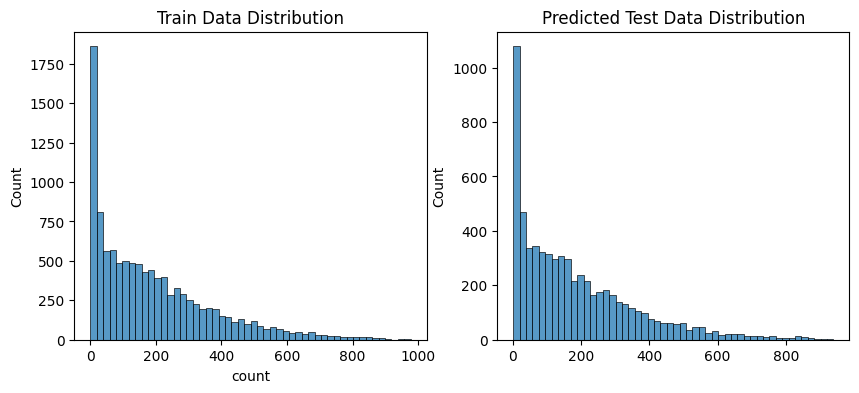

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

randomforest_preds = gridsearch_random_forest_model.best_estimator_.predict(X_test)

figure, axes = plt.subplots(ncols=2)
figure.set_size_inches(10, 4)

sns.histplot(y, bins=50, ax=axes[0])
axes[0].set_title('Train Data Distribution')
sns.histplot(np.exp(randomforest_preds), bins=50, ax=axes[1])
axes[1].set_title('Predicted Test Data Distribution');


In [21]:
submission['count'] = np.exp(randomforest_preds) # log transformation
submission.to_csv('submission.csv', index=False)